# This is Multiclass Classification problem

# 1.Import Necessary Dictionaries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter('ignore')

# 2.Import Data

In [2]:
Glass=pd.read_csv('glass.csv')
Glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


# 3.Data Understanding 

In [3]:
Glass.shape

(214, 10)

In [4]:
Glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
Glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
Glass.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [7]:
Glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [8]:
Glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Model Building


In [9]:
Array=Glass.values
X=Array[:,0:9]
y=Array[:,9]

### Using Training & Testing Data Spliting

In [10]:
X_Train,X_Test,y_Train,y_Test=train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
X_Train.shape,y_Train.shape,X_Test.shape,y_Test.shape

((171L, 9L), (171L,), (43L, 9L), (43L,))

# Model Training | Model Testing | Evolution without Normalizing the Data

### Generating Model With K=3

In [12]:
Knn_Model=KNeighborsClassifier(n_neighbors=3)
Knn_Model.fit(X_Train,y_Train)
y_pred=Knn_Model.predict(X_Test)
accuracy_score(y_pred,y_Test)

0.7441860465116279

### Generating Model With K=5

In [13]:
Knn_Model=KNeighborsClassifier(n_neighbors=5)
Knn_Model.fit(X_Train,y_Train)
y_pred=Knn_Model.predict(X_Test)
accuracy_score(y_pred,y_Test)

0.6511627906976745

### Generating Model With K=7

In [14]:
Knn_Model=KNeighborsClassifier(n_neighbors=7)
Knn_Model.fit(X_Train,y_Train)
y_pred=Knn_Model.predict(X_Test)
accuracy_score(y_pred,y_Test)

0.6046511627906976

In [15]:
X_Train

array([[ 1.5159 , 12.82   ,  3.52   , ...,  7.97   ,  0.     ,  0.     ],
       [ 1.51934, 13.64   ,  3.54   , ...,  8.89   ,  0.15   ,  0.24   ],
       [ 1.51818, 13.72   ,  0.     , ..., 10.99   ,  0.     ,  0.     ],
       ...,
       [ 1.51588, 13.12   ,  3.41   , ...,  8.39   ,  0.     ,  0.19   ],
       [ 1.51852, 14.09   ,  2.19   , ...,  9.32   ,  0.     ,  0.     ],
       [ 1.5182 , 12.62   ,  2.76   , ...,  9.42   ,  0.     ,  0.2    ]])

In [16]:
X_Train.std()

22.12409085089255

In [17]:
X_Train.mean()

11.265477966211828

# Model Training | Model Testing | Evolution with Normalizing the Data

## Standardized the data

In [18]:
Scaler=StandardScaler()
Scaled_X=Scaler.fit_transform(X)
Scaled_X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [19]:
pd.DataFrame(Scaled_X)

,0,1,2,3,4,5,6,7,8
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
5,-0.793931,-0.758384,0.643117,0.351521,0.412905,0.219689,-0.624699,-0.352877,2.088150
6,-0.308744,-0.132382,0.636168,-0.612137,0.568197,0.127475,-0.554268,-0.352877,-0.586451
7,-0.265836,-0.316500,0.643117,-0.792823,0.762313,0.112107,-0.504966,-0.352877,-0.586451
8,0.268859,0.775936,0.622270,-0.150384,-0.738850,0.096738,-0.462707,-0.352877,-0.586451
9,-0.269137,-0.500618,0.636168,-0.170460,0.438787,0.112107,-0.392276,-0.352877,0.545111


In [20]:
X_Train,X_Test,y_Train,y_Test=train_test_split(Scaled_X, y, test_size=0.20, random_state=42)
X_Train.shape,X_Test.shape,y_Train.shape,y_Test.shape

((171L, 9L), (43L, 9L), (171L,), (43L,))

In [21]:
X_Train

array([[-0.81373462, -0.72156039,  0.58057517, ..., -0.69513002,
        -0.35287683, -0.5864509 ],
       [ 0.32166886,  0.28495326,  0.59447339, ..., -0.0471626 ,
        -0.05049172,  1.88241125],
       [-0.06119975,  0.38314972, -1.86551055, ...,  1.43189347,
        -0.35287683, -0.5864509 ],
       ...,
       [-0.8203358 , -0.35332369,  0.50413499, ..., -0.39931881,
        -0.35287683,  1.36806497],
       [ 0.05102036,  0.83730832, -0.34365608, ...,  0.25569174,
        -0.35287683, -0.5864509 ],
       [-0.05459857, -0.96705153,  0.05244303, ...,  0.32612298,
        -0.35287683,  1.47093423]])

In [22]:
X_Test

array([[-2.69137018e-01, -5.00618371e-01,  6.36168030e-01,
        -1.70460232e-01,  4.38786730e-01,  1.12106515e-01,
        -3.92275686e-01, -3.52876828e-01,  5.45110920e-01],
       [-3.61553581e-01,  1.58605628e+00, -1.86551055e+00,
         1.79700922e+00,  8.14077586e-01, -7.63918639e-01,
        -4.90385747e-03,  9.77617652e-01, -5.86450902e-01],
       [ 1.04119781e+00, -4.39245587e-01,  6.70913566e-01,
        -1.15419496e+00, -5.57675197e-01, -4.71910254e-01,
         6.28977316e-01, -3.52876828e-01,  1.16232646e+00],
       [-7.74127520e-01,  1.77017463e+00, -1.86551055e+00,
         1.87731409e+00,  8.14077586e-01, -7.63918639e-01,
        -1.38723216e-01,  9.37299637e-01,  3.39372407e-01],
       [-4.24264820e-01,  3.83149716e-01,  6.91760888e-01,
         7.32969618e-01, -7.64732220e-01,  2.19688551e-01,
        -7.58518141e-01, -3.52876828e-01, -5.86450902e-01],
       [ 2.97864503e+00, -2.93098061e+00, -1.86551055e+00,
        -1.39510958e+00,  5.55256306e-01, -7.639186

### Generating Model with K=3

In [35]:
Knn_Model=KNeighborsClassifier(n_neighbors=3)
Knn_Model.fit(X_Train,y_Train)
y_pred=Knn_Model.predict(X_Test)
accuracy_score(y_pred,y_Test)

0.7674418604651163

### Generating Model with K=5

In [24]:
Knn_Model=KNeighborsClassifier(n_neighbors=5)
Knn_Model.fit(X_Train,y_Train)
y_pred=Knn_Model.predict(X_Test)
accuracy_score(y_pred,y_Test)

0.6976744186046512

### Generating Model with K=7

In [25]:
Knn_Model=KNeighborsClassifier(n_neighbors=7)
Knn_Model.fit(X_Train,y_Train)
y_pred=Knn_Model.predict(X_Test)
accuracy_score(y_pred,y_Test)

0.7209302325581395

## How to Pick Up optimum No of k

In [26]:
neighbors=list(range(1,50,2))  #No of of K from 1 to 50 with 2 steps like 1,3,5,7
cv_Scores=[] 
for i in neighbors:
    knn_Model=KNeighborsClassifier(n_neighbors=i)
    cv_Score=cross_val_score(knn_Model,X,y,cv=10)
    #print(i,'-',cv_score.mean())
    cv_Scores.append(cv_Score.mean())

In [27]:
cv_Scores

[0.6547731978166761,
 0.6734688499905891,
 0.6547170462387853,
 0.6367140347575131,
 0.5878998055085012,
 0.5929186272664534,
 0.6081162557249514,
 0.6031162557249514,
 0.6172664533534099,
 0.6168119078988645,
 0.6072664533534098,
 0.6211004454482716,
 0.6212980739067696,
 0.6256458999937261,
 0.6345391806261371,
 0.6289836250705816,
 0.6200903444381706,
 0.6057829851308112,
 0.6148927159796725,
 0.6009994353472614,
 0.5820051446138402,
 0.5969085262563525,
 0.5925607001693959,
 0.5770051446138401,
 0.5681118639814292]

In [29]:
neighbors[cv_Scores.index(max(cv_Scores))]

3

# Visualizing the K neighbors to see clearly 

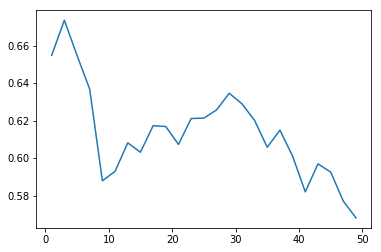

In [33]:
plt.plot(neighbors,cv_Scores)

### From the above we can see that the K=3 is gives best accuracy comparatively others.